In [64]:
import pandas as pd

# Correct file path and encoding fix
file_path = r"C:\Users\hari2\Downloads\project_dada_39127597.csv"
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# View the first few rows
df.head()

    

,ï»¿,Tweet,Followers,Friends,Num_tweets,Verified,Listed_count,Location,Age,Length,Num_users,Num_author_replies,TOXICITY_x,Num_toxic_direct_replies,Num_toxic_nested_replies,Num_author_toxic_replies,Num_toxic_replies,Toxic
0,0,1.441500e+18,1198,605.0,6166,False,1,True,7,6,4,2,0.235235,0,0,0,0,0
1,1,1.431810e+18,608,1259.0,1811,False,5,True,2,2,2,0,0.085582,0,0,0,0,0
2,2,1.426640e+18,173,167.0,4306,False,0,True,0,4,2,2,0.076877,0,0,0,0,0
3,3,1.431810e+18,2540,222.0,6008,False,0,True,9,2,2,0,0.095684,0,0,0,0,0
4,4,1.432860e+18,4439,11.0,9985,False,55,True,2,4,3,1,0.165919,0,0,0,0,0


In [33]:
print(df.columns)

Index(['ï»¿', 'Tweet', 'Followers', 'Friends', 'Num_tweets', 'Verified',
       'Listed_count', 'Location', 'Age', 'Length', 'Num_users',
       'Num_author_replies', 'TOXICITY_x', 'Num_toxic_direct_replies',
       'Num_toxic_nested_replies', 'Num_author_toxic_replies',
       'Num_toxic_replies', 'Toxic'],
      dtype='object')


In [66]:
df = df.drop(columns='ï»¿')
df.head()


,Tweet,Followers,Friends,Num_tweets,Verified,Listed_count,Location,Age,Length,Num_users,Num_author_replies,TOXICITY_x,Num_toxic_direct_replies,Num_toxic_nested_replies,Num_author_toxic_replies,Num_toxic_replies,Toxic
0,1.441500e+18,1198,605.0,6166,False,1,True,7,6,4,2,0.235235,0,0,0,0,0
1,1.431810e+18,608,1259.0,1811,False,5,True,2,2,2,0,0.085582,0,0,0,0,0
2,1.426640e+18,173,167.0,4306,False,0,True,0,4,2,2,0.076877,0,0,0,0,0
3,1.431810e+18,2540,222.0,6008,False,0,True,9,2,2,0,0.095684,0,0,0,0,0
4,1.432860e+18,4439,11.0,9985,False,55,True,2,4,3,1,0.165919,0,0,0,0,0


In [81]:
print("Shape:", df.shape)

Shape: (28823, 17)


Interpretation: This dataset consists of 28823 rows and 17 columns.


In [37]:
print(df.dtypes)

Tweet                       float64
Followers                     int64
Friends                     float64
Num_tweets                    int64
Verified                       bool
Listed_count                  int64
Location                     object
Age                           int64
Length                        int64
Num_users                     int64
Num_author_replies            int64
TOXICITY_x                  float64
Num_toxic_direct_replies      int64
Num_toxic_nested_replies      int64
Num_author_toxic_replies      int64
Num_toxic_replies             int64
Toxic                         int64
dtype: object


Tweet                       float64,
Followers                     int64
Friends                     float64
Num_tweets                    int64
Verified                       bool
Listed_count                  int64
Location                     object
Age                           int64
Length                        int64
Num_users                     int64
Num_author_replies            int64
TOXICITY_x                  float64
Num_toxic_direct_replies      int64
Num_toxic_nested_replies      int64
Num_author_toxic_replies      int64
Num_toxic_replies             int64
Toxic                         int64
dtype: object


In [7]:
# Step 4: Remove the rows containing missing values
df_cleaned = df.dropna()
print("New shape after dropping NA:", df_cleaned.shape)

New shape after dropping NA: (28821, 17)


Interpretation: 2 rows were removed due to missing values.


In [38]:
# Step 5: Remove duplicate rows
df_cleaned = df_cleaned.drop_duplicates()
print("New shape after dropping duplicates:", df_cleaned.shape)

New shape after dropping duplicates: (28818, 19)


Interpretation: 3 duplicate rows were removed.


In [39]:
df_cleaned.rename(columns={"TOXICITY_x": "Toxicity"}, inplace=True)

# Now apply the transformation
df_cleaned["Toxicity"] = df_cleaned["Toxicity"].apply(lambda x: 1 if x >= 0.5 else 0)


In [40]:
print(df_cleaned["Toxicity"].value_counts())


Toxicity
0    25812
1     3006
Name: count, dtype: int64


In [41]:
# Step 7: Create Total_toxic_replies column
df_cleaned["Total_toxic_replies"] = df_cleaned["Num_toxic_direct_replies"] + df_cleaned["Num_toxic_nested_replies"]

In [42]:
print(df_cleaned["Total_toxic_replies"].describe)

<bound method NDFrame.describe of 0         0
1         0
2         0
3         0
4         0
         ..
28818     0
28819    10
28820     2
28821     0
28822     0
Name: Total_toxic_replies, Length: 28818, dtype: int64>


In [43]:
# Step 8: Create Toxic_conversation column
df_cleaned["Toxic_conversation"] = df_cleaned["Total_toxic_replies"].apply(lambda x: 1 if x > 0 else 0)

In [44]:
print(df_cleaned["Toxic_conversation"].describe) #step9 

<bound method NDFrame.describe of 0        0
1        0
2        0
3        0
4        0
        ..
28818    0
28819    1
28820    1
28821    0
28822    0
Name: Toxic_conversation, Length: 28818, dtype: int64>


In [45]:
# Discuss mean value and what it might indicate.

# Step 10: Get descriptive statistics of number of unique users
print(df_cleaned["Num_users"].describe())


count    28818.000000
mean         5.664064
std         20.054350
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max        925.000000
Name: Num_users, dtype: float64


Interpretation: The mean conversation length is 5.66. This suggests that on average, each conversation contains 2 tweets.

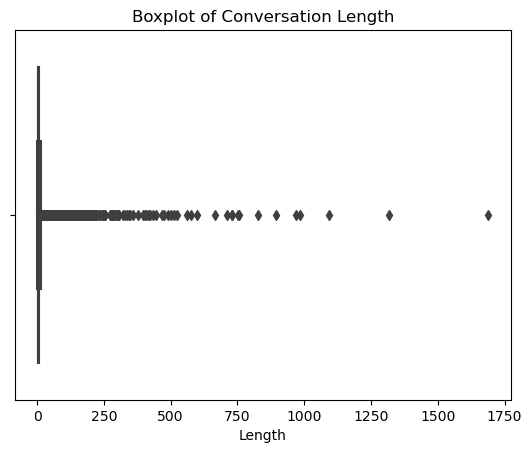

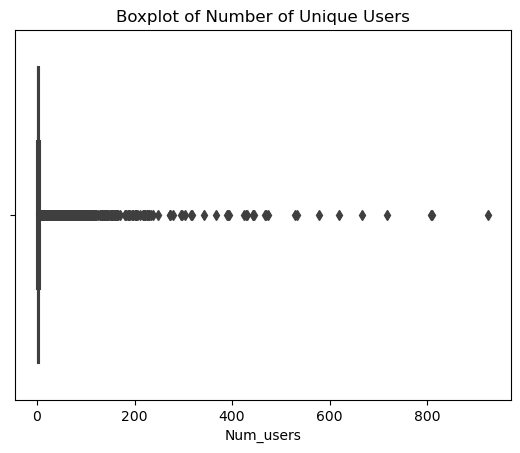

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x=df_cleaned["Length"])
plt.title("Boxplot of Conversation Length")
plt.show()

sns.boxplot(x=df_cleaned["Num_users"])
plt.title("Boxplot of Number of Unique Users")
plt.show()



In [47]:
import numpy as np
df_cleaned.replace([np.inf, -np.inf], np.nan, inplace=True)

C:\Users\hari2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


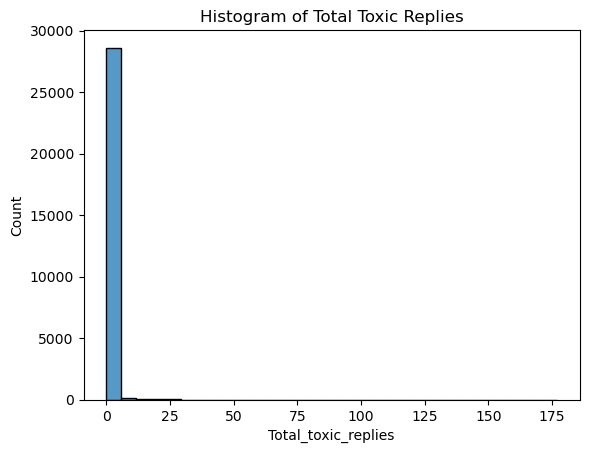

In [48]:

# Step 12: Histogram of Total_toxic_replies

sns.histplot(df_cleaned["Total_toxic_replies"], bins=30, kde=False)
plt.title("Histogram of Total Toxic Replies")
plt.show()


Interpretation: Most conversations have 0 toxic replies. The distribution is right-skewed with a long tail.


In [49]:
# Step 13: Value count for Toxic_conversation
print(df_cleaned["Toxic_conversation"].value_counts())


Toxic_conversation
0    21613
1     7205
Name: count, dtype: int64


Interpretation: 7205 conversations contain toxic replies, while 21613 do not.


In [ ]:
# Count of conversations with toxic replies.

# Step 14: Histogram of Num_author_replies
sns.histplot(df_cleaned["Num_author_replies"], bins=30, kde=False)
plt.title("Histogram of Author Replies")
plt.show()

C:\Users\hari2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


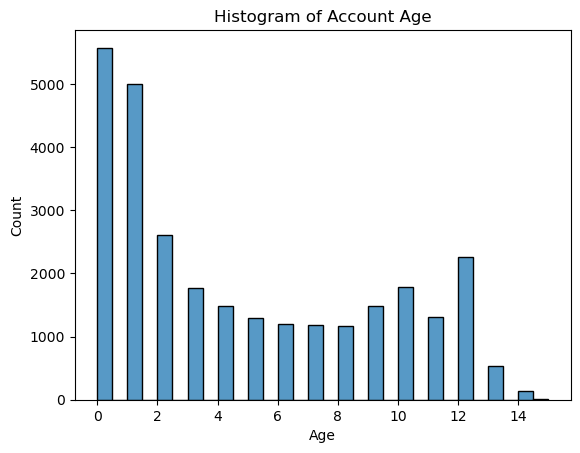

In [52]:
# Step 15: Histogram of account Age
sns.histplot(df_cleaned["Age"], bins=30, kde=False)
plt.title("Histogram of Account Age")
plt.show()

Interpretation: The majority of accounts are around 0 years old.


In [53]:
# Step 16: Mean length of toxic vs non-toxic conversations
print(df_cleaned.groupby("Toxic_conversation")["Length"].mean())

Toxic_conversation
0     5.412483
1    17.877307
Name: Length, dtype: float64


In [54]:
# Step 17: Mean followers by verified status
print(df_cleaned.groupby("Verified")["Followers"].mean())

Verified
False      6022.879054
True     572177.384670
Name: Followers, dtype: float64


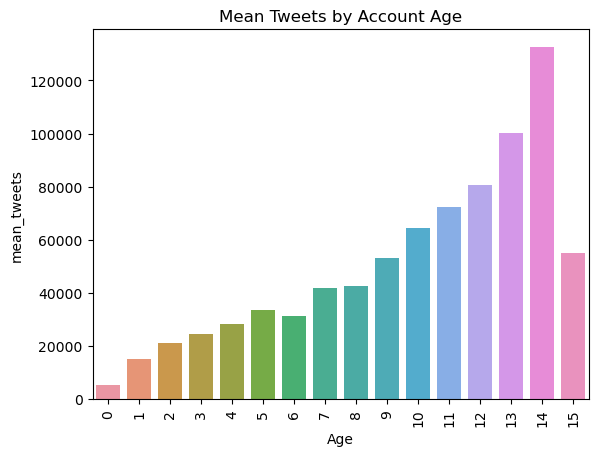

In [55]:
# Step 18: Mean tweets by account age
mean_tweets_by_age = df_cleaned.groupby("Age")["Num_tweets"].mean().reset_index(name="mean_tweets")
sns.barplot(data=mean_tweets_by_age, x="Age", y="mean_tweets")
plt.xticks(rotation=90)
plt.title("Mean Tweets by Account Age")
plt.show()

In [56]:
# Step 19: Crosstab of Toxic_conversation and Verified
ct = pd.crosstab(df_cleaned["Toxic_conversation"], df_cleaned["Verified"])
print(ct)

Verified            False  True 
Toxic_conversation              
0                   20802    811
1                    6607    598


In [57]:
# Step 20: Chi-square test
from scipy.stats import chi2_contingency

chi2, p, dof, expected = chi2_contingency(ct)
print(f"Chi2: {chi2}, p-value: {p}")

Chi2: 239.3148979065939, p-value: 5.547396807333776e-54


Interpretation:
H₀ (Null Hypothesis):Toxicity of a conversation is independent of whether the user is verified or not.  
H₁ (Alternative Hypothesis): Toxicity of a conversation is associated with verification status.

The Chi-square test resulted in a χ² value of 239.31 with a p-value of 5.55 × 10⁻⁵⁴, which is much smaller than 0.05.  
Therefore, we reject the null hypothesis.

This suggests that there is a statistically significant relationship between verification status and whether a conversation contains toxic replies. In other words, being a verified user is not independent of the likelihood of being involved in a toxic conversation.




In [62]:
# State H0 and H1, and whether we reject or fail to reject H0.

# Step 21: Split data into toxic and non-toxic
toxic_df = df_cleaned[df_cleaned["Toxic_conversation"] == 1]
non_toxic_df = df_cleaned[df_cleaned["Toxic_conversation"] == 0]
toxic_df.head()



,Tweet,Followers,Friends,Num_tweets,Verified,Listed_count,Location,Age,Length,Num_users,Num_author_replies,Toxicity,Num_toxic_direct_replies,Num_toxic_nested_replies,Num_author_toxic_replies,Num_toxic_replies,Toxic,Total_toxic_replies,Toxic_conversation
6,1.433960e+18,3467,196.0,10847,False,38,True,0,18,5,6,0,0,1,0,1,1,1,1
13,1.427330e+18,161,107.0,2781,False,0,False,2,2,2,0,0,1,0,0,1,1,1,1
15,1.431810e+18,150,203.0,2428,False,4,False,0,2,2,0,1,1,0,0,1,1,1,1
26,1.434940e+18,729,739.0,21546,False,1,True,9,3,2,1,0,1,0,0,1,1,1,1
33,1.437600e+18,304,625.0,465,False,0,True,0,7,4,1,1,1,0,0,1,1,1,1


In [63]:
non_toxic_df.head() #step21 continous

,Tweet,Followers,Friends,Num_tweets,Verified,Listed_count,Location,Age,Length,Num_users,Num_author_replies,Toxicity,Num_toxic_direct_replies,Num_toxic_nested_replies,Num_author_toxic_replies,Num_toxic_replies,Toxic,Total_toxic_replies,Toxic_conversation
0,1.441500e+18,1198,605.0,6166,False,1,True,7,6,4,2,0,0,0,0,0,0,0,0
1,1.431810e+18,608,1259.0,1811,False,5,True,2,2,2,0,0,0,0,0,0,0,0,0
2,1.426640e+18,173,167.0,4306,False,0,True,0,4,2,2,0,0,0,0,0,0,0,0
3,1.431810e+18,2540,222.0,6008,False,0,True,9,2,2,0,0,0,0,0,0,0,0,0
4,1.432860e+18,4439,11.0,9985,False,55,True,2,4,3,1,0,0,0,0,0,0,0,0


C:\Users\hari2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


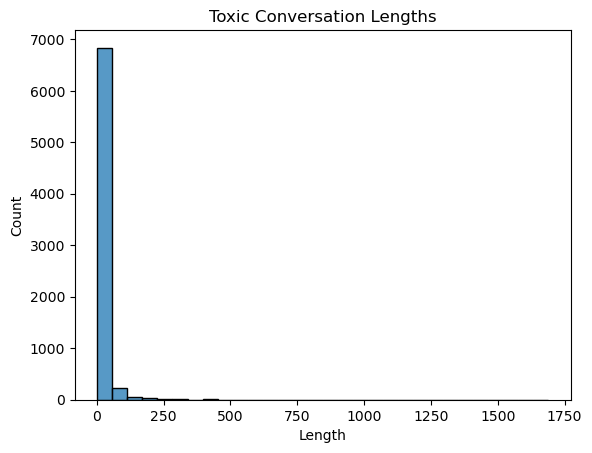

In [67]:
# Step 22: Histogram of toxic conversation lengths
sns.histplot(toxic_df["Length"], bins=30)
plt.title("Toxic Conversation Lengths")
plt.show()


C:\Users\hari2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


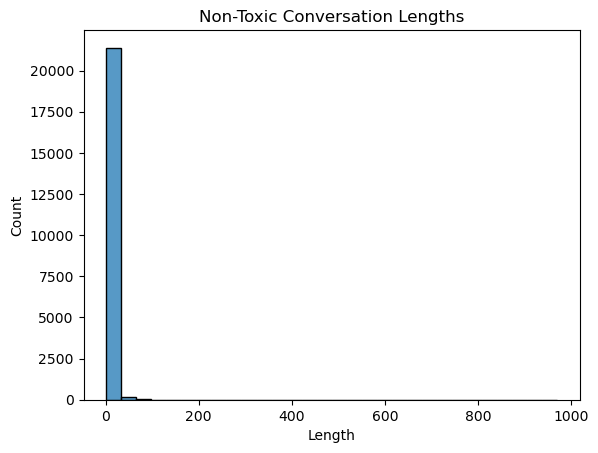

In [68]:
# Step 23: Histogram of non-toxic conversation lengths
sns.histplot(non_toxic_df["Length"], bins=30)
plt.title("Non-Toxic Conversation Lengths")
plt.show()

In [69]:
# Step 24: Mann-Whitney test (length)
from scipy.stats import mannwhitneyu

u_stat, p_val = mannwhitneyu(toxic_df["Length"], non_toxic_df["Length"])
print(f"Mann-Whitney U-stat: {u_stat}, p-value: {p_val}")


Mann-Whitney U-stat: 113183967.0, p-value: 0.0


Interpretation:
**H₀**: There is no difference in conversation lengths between toxic and non-toxic conversations.  
**H₁**: There is a significant difference in conversation lengths between toxic and non-toxic conversations.
The p-value is " 0.0 ", which is far less than 0.05. Therefore, we  " reject " the null hypothesis and conclude that there is a statistically significant difference in conversation lengths between toxic and non-toxic conversations.



C:\Users\hari2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


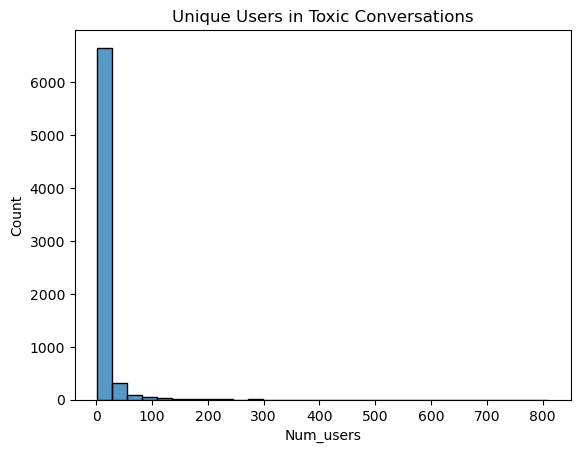

In [70]:
# Step 25: Histogram of unique users (toxic)
sns.histplot(toxic_df["Num_users"], bins=30)
plt.title("Unique Users in Toxic Conversations")
plt.show()

C:\Users\hari2\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


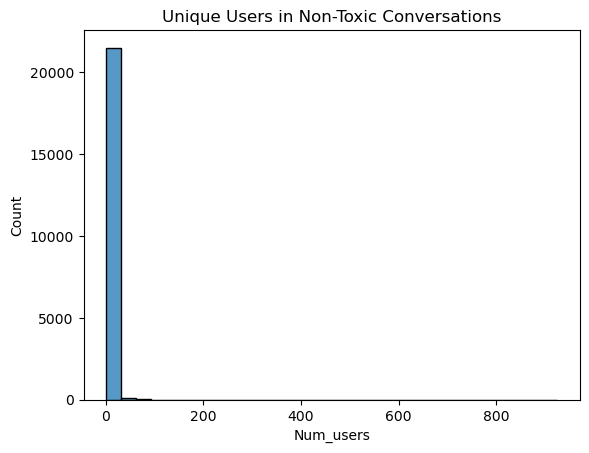

In [71]:
# Step 26: Histogram of unique users (non-toxic)
sns.histplot(non_toxic_df["Num_users"], bins=30)
plt.title("Unique Users in Non-Toxic Conversations")
plt.show()

In [72]:
# Step 27: Mann-Whitney test (users)
u_stat_users, p_val_users = mannwhitneyu(toxic_df["Num_users"], non_toxic_df["Num_users"])
print(f"Mann-Whitney U-stat: {u_stat_users}, p-value: {p_val_users}")


Mann-Whitney U-stat: 108388312.5, p-value: 0.0


Interpretation:
**H₀**: There is no difference in the number of unique users between toxic and non-toxic conversations.  
**H₁**: There is a significant difference in the number of unique users between toxic and non-toxic conversations.

The p-value is " 0.0 ", so we " reject the null hypothesis ". This indicates a significant difference in the number of users involved in toxic vs. non-toxic conversations.



In [73]:
# Step 28: T-tests
from scipy.stats import ttest_ind

t_stat_len, p_t_len = ttest_ind(toxic_df["Length"], non_toxic_df["Length"])
t_stat_users, p_t_users = ttest_ind(toxic_df["Num_users"], non_toxic_df["Num_users"])

print(f"T-test Length: t={t_stat_len}, p={p_t_len}")
print(f"T-test Users: t={t_stat_users}, p={p_t_users}")


T-test Length: t=32.1487580990876, p=7.98320672131386e-223
T-test Users: t=28.717472597708117, p=7.660097368029594e-179


Interpretation:
The t-tests for both conversation length and number of unique users also show extremely small p-values (far below 0.05), confirming that there are statistically significant differences between toxic and non-toxic conversations in both dimensions.

However, because the distributions of conversation length and number of users are not normal (as seen in earlier histograms and boxplots), the Mann-Whitney U test is more appropriate for these comparisons. It does not assume normality and is more robust for skewed data.

